In [ ]:
# Import libraries necessary for this project
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import boston_housing
import keras

In [ ]:
# showing backend
keras.backend.backend()

'tensorflow'

In [ ]:
# Load the Boston housing dataset
(X_train, Y_train), (X_test, Y_test) = boston_housing.load_data()

57344/57026 [==============================] - 0s 0us/step


In [ ]:
# Exploring the data
print('Training data: {} and {}'.format(X_train.shape, Y_train.shape))
print('Testing data: {} and {}'.format(X_test.shape, Y_test.shape))

Training data: (404, 13) and (404,)
Testing data: (102, 13) and (102,)


In [ ]:
# Showing the data
print('Training input')
print(X_train)
print('Training output')
print(Y_train)

Training input
[[1.23247e+00 0.00000e+00 8.14000e+00 ... 2.10000e+01 3.96900e+02
  1.87200e+01]
 [2.17700e-02 8.25000e+01 2.03000e+00 ... 1.47000e+01 3.95380e+02
  3.11000e+00]
 [4.89822e+00 0.00000e+00 1.81000e+01 ... 2.02000e+01 3.75520e+02
  3.26000e+00]
 ...
 [3.46600e-02 3.50000e+01 6.06000e+00 ... 1.69000e+01 3.62250e+02
  7.83000e+00]
 [2.14918e+00 0.00000e+00 1.95800e+01 ... 1.47000e+01 2.61950e+02
  1.57900e+01]
 [1.43900e-02 6.00000e+01 2.93000e+00 ... 1.56000e+01 3.76700e+02
  4.38000e+00]]
Training output
[15.2 42.3 50.  21.1 17.7 18.5 11.3 15.6 15.6 14.4 12.1 17.9 23.1 19.9
 15.7  8.8 50.  22.5 24.1 27.5 10.9 30.8 32.9 24.  18.5 13.3 22.9 34.7
 16.6 17.5 22.3 16.1 14.9 23.1 34.9 25.  13.9 13.1 20.4 20.  15.2 24.7
 22.2 16.7 12.7 15.6 18.4 21.  30.1 15.1 18.7  9.6 31.5 24.8 19.1 22.
 14.5 11.  32.  29.4 20.3 24.4 14.6 19.5 14.1 14.3 15.6 10.5  6.3 19.3
 19.3 13.4 36.4 17.8 13.5 16.5  8.3 14.3 16.  13.4 28.6 43.5 20.2 22.
 23.  20.7 12.5 48.5 14.6 13.4 23.7 50.  21.7 39.8 38

In [ ]:
# Preprocessing: Normalizing training data

mean1 = X_train.mean(axis=0)
std1 = X_train.std(axis=0)
X_train = (X_train - mean1) / std1

# Preprocessing: Normalizing testing data

mean2 = X_test.mean(axis=0)
std2 = X_test.std(axis=0)
X_test = (X_test - mean2) / std2

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

In [ ]:
model = Sequential()
model.add(Dense(13, input_dim = 13, activation = 'relu', kernel_initializer = 'normal'))
model.add(Dense(6, activation = 'relu', kernel_initializer = 'normal'))
model.add(Dense(6, activation = 'relu', kernel_initializer = 'normal'))
model.add(Dense(1, activation = 'linear'))

model.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics = ['mean_squared_error'])

In [ ]:
print(model.summary())

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_40 (Dense)             (None, 13)                182       
_________________________________________________________________
dense_41 (Dense)             (None, 6)                 84        
_________________________________________________________________
dense_42 (Dense)             (None, 6)                 42        
_________________________________________________________________
dense_43 (Dense)             (None, 1)                 7         
Total params: 315
Trainable params: 315
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
epochs = 500
batch_size = 32

model.fit(X_train, Y_train, batch_size = batch_size, epochs = epochs, validation_data = (X_test, Y_test))

Epoch 1/500
13/13 [==============================] - 0s 10ms/step - loss: 585.8239 - mean_squared_error: 585.8239 - val_loss: 614.9443 - val_mean_squared_error: 614.9443
Epoch 2/500
13/13 [==============================] - 0s 3ms/step - loss: 584.7988 - mean_squared_error: 584.7988 - val_loss: 613.8357 - val_mean_squared_error: 613.8357
Epoch 3/500
13/13 [==============================] - 0s 3ms/step - loss: 583.6365 - mean_squared_error: 583.6365 - val_loss: 612.4979 - val_mean_squared_error: 612.4979
Epoch 4/500
13/13 [==============================] - 0s 3ms/step - loss: 582.1686 - mean_squared_error: 582.1686 - val_loss: 610.7265 - val_mean_squared_error: 610.7265
Epoch 5/500
13/13 [==============================] - 0s 2ms/step - loss: 580.0591 - mean_squared_error: 580.0591 - val_loss: 608.0483 - val_mean_squared_error: 608.0483
Epoch 6/500
13/13 [==============================] - 0s 3ms/step - loss: 576.7294 - mean_squared_error: 576.7294 - val_loss: 603.6387 - val_mean_squared_e

In [ ]:
predictions = model.predict(X_test)
predictions = predictions.reshape(predictions.shape[0])

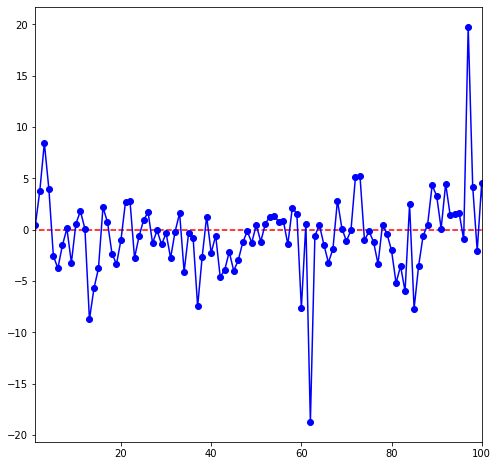

4/4 [==============================] - 0s 2ms/step - loss: 16.3716 - mean_squared_error: 16.3716
Mean Squared Error: 16.37158966064453


In [ ]:
plt.figure(figsize = (8, 8))
plt.hlines(0, 0, 100, colors = 'r', linestyles = 'dashed')

plt.plot(predictions - Y_test, 'bo-')
plt.xlim((1, 100))

plt.show()

print('Mean Squared Error: {}'.format(model.evaluate(X_test, Y_test)[0]))